# Tutorial: Reading Rigol Stored Waveforms

**Scott Prahl**

**Jan 2020**

In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

import RigolWFM.wfm as wfm

## Introduction

So you have saved a trace with the Rigol scope as a file and want to use it in a lab report.  You opted not to change the default to csv format and are stuck with a file names `test.wfm`

One option is to go to [Rigol](https://rigol.desk.com/customer/en/portal/articles/2282335-wfm-converter) and download their converter.

If you want to work completely within the Jupyter notebook framework then you'll need to download a library.

In [2]:
#import sys
#!{sys.executable} -m pip install RigolWFM

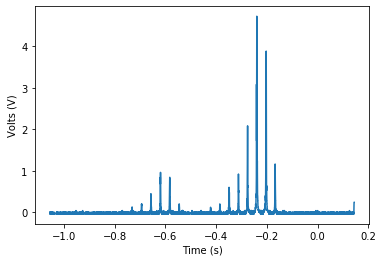

In [3]:
data = wfm.signals("DS1102E.wfm")

t,y = data
plt.plot(t,y)
plt.xlabel("Time (s)")
plt.ylabel("Volts (V)")
plt.show()


In [4]:
x = wfm.describe("DS1102E.wfm")
print(x)


General
Cur. selected channel    : CH1
Alternate trigger        : False

Channel CH1
Enabled                  : 1
Probe attenuation        : 1.0
Y grid scale             : 1.000e+00 V/div
Y shift                  : -3.440e+00 V
Y inverted               : 0
Time grid scale          : 1.000e-01 s/div
Samplerate               : 1.365e+04 Samples/s
Time delay               : -4.560e-01 s
No. of recorded samples  : 16384

Trigger
Mode                     : Edge
Source                   : CH2
Coupling                 : DC
Sweep                    : Auto
Holdoff                  : 5.000e-07 s
Sensitivity              : 3.800e-01 div
Level                    : 4.800e-01 V
Edge direction           : FALL

Channel CH2
Enabled                  : 0

Trigger
Mode                     : Edge
Source                   : CH2
Coupling                 : DC
Sweep                    : Auto
Holdoff                  : 5.000e-07 s
Sensitivity              : 3.800e-01 div
Level                    : 4.800e-01 V